In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data-mining-dataset/clothes_size.csv")
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [ ]:
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [ ]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [ ]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [ ]:
df.weight.mean()

61.756095104613394

In [ ]:
df.weight.median()

61.0

In [ ]:
df.weight.mode()

0    58
dtype: int64

In [ ]:
df.height.mean()

165.8070678875258

In [ ]:
df.height.median()

165.1

In [ ]:
df.height.mode()

0    162.56
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lable_encoder = LabelEncoder()
df["new_size"] = lable_encoder.fit_transform(df["size"])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weight,age,height,size,new_size
0,62,28.0,172.72,XL,3
1,59,36.0,167.64,L,0
2,61,34.0,165.10,M,1
3,65,27.0,175.26,L,0
4,62,45.0,172.72,M,1
...,...,...,...,...,...
119729,63,42.0,175.26,M,1
119730,45,29.0,154.94,S,2
119731,61,31.0,172.72,M,1
119732,74,31.0,167.64,XL,3


In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt

<BarContainer object of 7 artists>

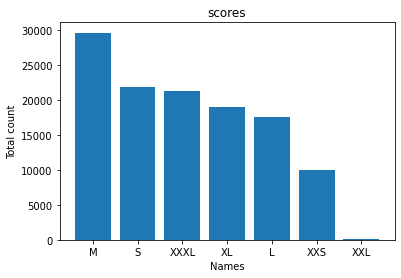

In [ ]:
fig, ax = plt.subplots()
data = df['size'].value_counts()

name =data.index
count = data.values
plt.title('scores')
plt.xlabel('Names')
plt.ylabel('Total count')
ax.bar(name,count)

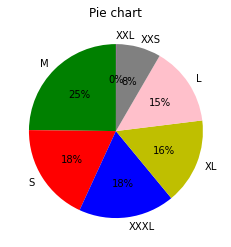

In [ ]:
slices = df['size'].value_counts()
activity = data.index
cols = ['g','r','b','y','pink','gray','purple']
plt.pie(slices,
        labels= activity,
        colors= cols,
        startangle =90,
        shadow = False,
       
        autopct = "%1.0f%%")
plt.title ('Pie chart')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
df

,weight,age,height,size,new_size
0,62,28.0,172.72,XL,3
1,59,36.0,167.64,L,0
2,61,34.0,165.10,M,1
3,65,27.0,175.26,L,0
4,62,45.0,172.72,M,1
...,...,...,...,...,...
119729,63,42.0,175.26,M,1
119730,45,29.0,154.94,S,2
119731,61,31.0,172.72,M,1
119732,74,31.0,167.64,XL,3


In [ ]:
df = df.dropna()

In [ ]:
x= df.drop(['size','age','new_size'],axis=1)

x

,weight,height
0,62,172.72
1,59,167.64
2,61,165.10
3,65,175.26
4,62,172.72
...,...,...
119729,63,175.26
119730,45,154.94
119731,61,172.72
119732,74,167.64


In [ ]:
y = df['size']
y

0         XL
1          L
2          M
3          L
4          M
          ..
119729     M
119730     S
119731     M
119732    XL
119733    XL
Name: size, Length: 119153, dtype: object

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
l = LabelEncoder()
y_train = l.fit_transform(y_train)
y_test = l.fit_transform(y_test)


In [ ]:
y_train

array([3, 1, 2, ..., 5, 6, 2])

In [ ]:
y_test

array([1, 0, 6, ..., 3, 1, 5])

In [ ]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)
linReg.score(x_train,y_train)

0.2023419540177888

In [ ]:
lin_acc = linReg.score(x_test,y_test)
lin_acc

0.19518061937965037

In [ ]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
logReg.score(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4894567885692705

In [ ]:
log_acc = logReg.score(x_test,y_test)
log_acc

0.4858797364776971

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
new_x= min_max_scaler.fit_transform(x)

In [ ]:
new_x

array([[0.35087719, 0.63636364],
       [0.3245614 , 0.54545455],
       [0.34210526, 0.5       ],
       ...,
       [0.34210526, 0.63636364],
       [0.45614035, 0.54545455],
       [0.42105263, 0.54545455]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size = 0.2)

In [ ]:
l = LabelEncoder()
y_train = l.fit_transform(y_train)
y_test = l.fit_transform(y_test)

In [ ]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)
linReg.score(x_test,y_test)

0.19537872338256213

In [ ]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
logReg.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.49943351097310223

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1001)
knn.fit(x_train,y_train)
knn.predict(x_test)

array([1, 1, 1, ..., 1, 3, 2])

In [ ]:
knn_acc = knn.score(x_test,y_test)
knn_acc

0.5029163694347698

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
mnb_acc = mnb.score(x_test,y_test)
mnb_acc

0.24766061012966303

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.predict(x_test)

array([1, 1, 1, ..., 1, 3, 2])

In [ ]:
dt_acc = dt.score(x_test,y_test)
dt_acc

0.5037556124375813

In [ ]:
rmf = RandomForestClassifier()
rmf.fit(x_train,y_train)
rmf.predict(x_test)

array([1, 1, 1, ..., 1, 3, 2])

In [ ]:
rmf_acc = rmf.score(x_test,y_test)
rmf_acc

0.5040913096387059

In [ ]:
svc = SVC(random_state=1000)
svc.fit(x_train,y_train)
svc.predict(x_test)

array([1, 1, 1, ..., 1, 3, 2])

In [ ]:
svc_acc = svc.score(x_test,y_test)
svc_acc

0.4977969871176199

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = df[['weight','height']]
df

,weight,height
0,62,172.72
1,59,167.64
2,61,165.10
3,65,175.26
4,62,172.72
...,...,...
119729,63,175.26
119730,45,154.94
119731,61,172.72
119732,74,167.64


Text(0, 0.5, 'Height')

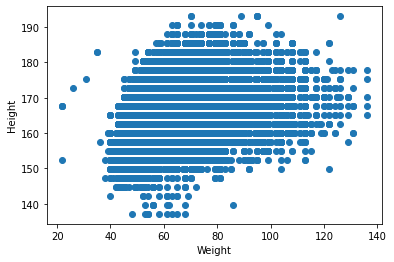

In [ ]:
plt.scatter(df.weight,df.height)
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

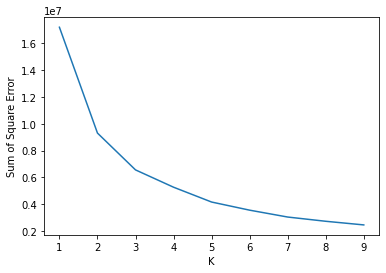

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df)
y_predicted

array([4, 1, 2, ..., 4, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,weight,height,cluster
0,62,172.72,4
1,59,167.64,1
2,61,165.10,2
3,65,175.26,4
4,62,172.72,4


In [ ]:
km.cluster_centers_

array([[ 76.35708775, 169.88265413],
       [ 55.82501672, 166.67437525],
       [ 64.7585832 , 162.62989169],
       [ 96.8402389 , 169.58553191],
       [ 63.8670104 , 173.98300027],
       [ 52.33328187, 158.00474639]])

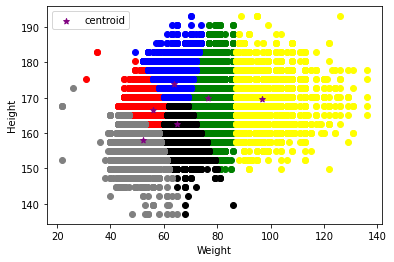

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
# df7 = df[df.cluster==6]

plt.scatter(df1.weight,df1.height,color='green')
plt.scatter(df2.weight,df2.height,color='red')
plt.scatter(df3.weight,df3.height,color='black')
plt.scatter(df4.weight,df4.height,color='yellow')
plt.scatter(df5.weight,df5.height,color='blue')
plt.scatter(df6.weight,df6.height,color='gray')
# plt.scatter(df7.weight,df7.height,color='pink')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()

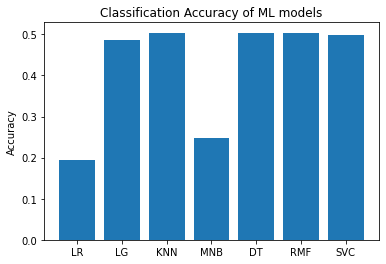

In [ ]:
labels = ['LR', 'LG', 'KNN', 'MNB', 'DT', 'RMF','SVC']
accuracies = [lin_acc, log_acc, knn_acc, mnb_acc, dt_acc, rmf_acc,svc_acc]

x = [0,1,2,3,4,5,6]
width=0.35

fig, ax = plt.subplots()
ax.bar(x=labels,height=accuracies)

ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracy of ML models')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()